<a href="https://colab.research.google.com/github/nzungizelab/country_map/blob/NzungizeL/country_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Produce a country map using Python

In [ ]:
!pip install basemap
#!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

In [ ]:
# print version of basemap
from mpl_toolkits import basemap
print(basemap.__version__)

1.3.8


Building a map with the basemap library

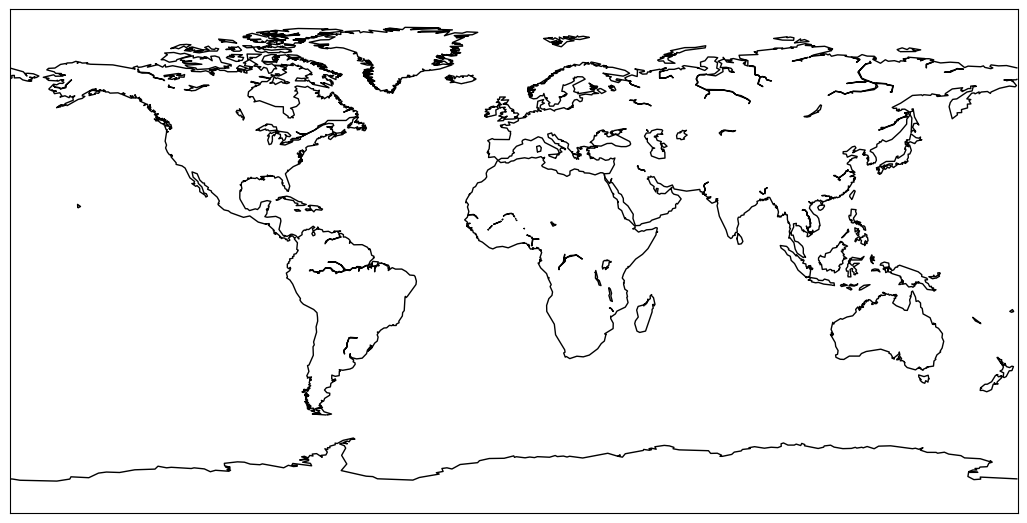

In [ ]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Always start witht the basemap function to initialize a map
m=Basemap()

# Show the coast lines
m.drawcoastlines()

plt.show();

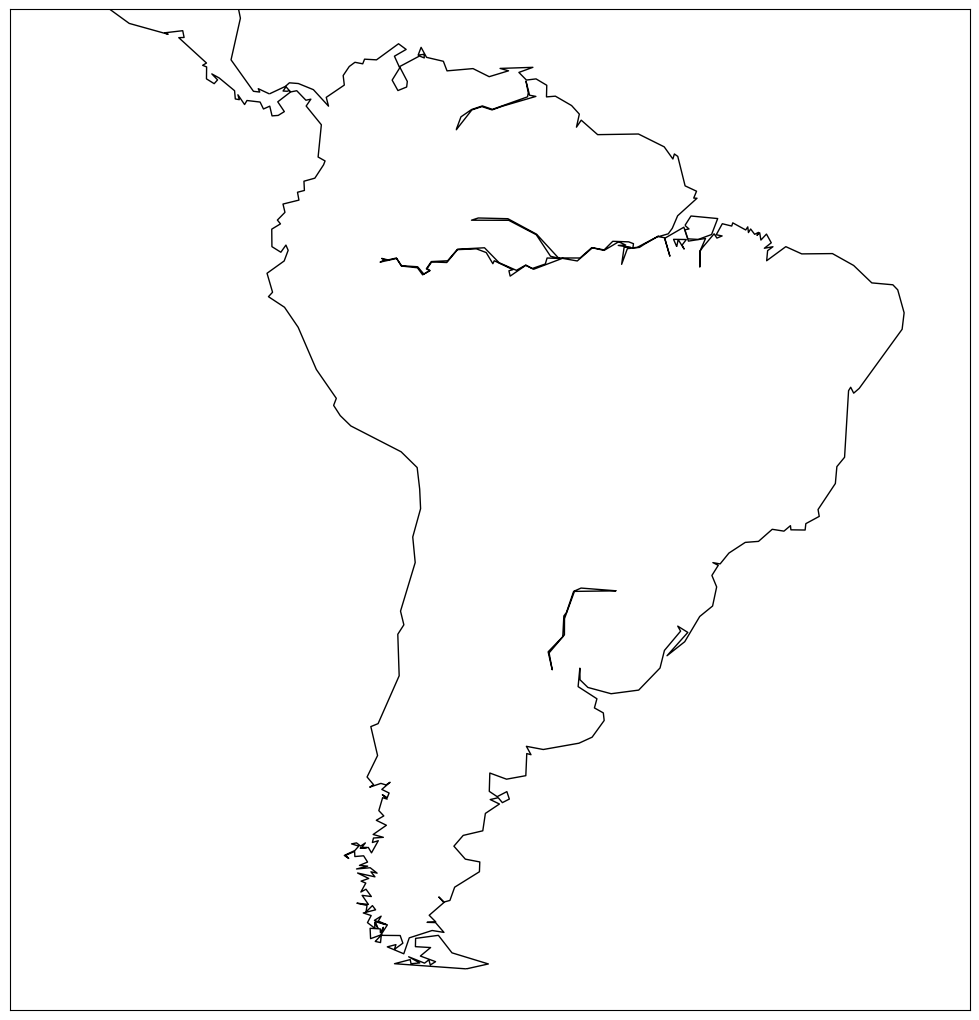

In [ ]:
#coastlines can be added with the drawcoastlines()
#select a specific area of the world example south africa
m=Basemap(llcrnrlon=-100, llcrnrlat=-58,urcrnrlon=-30,urcrnrlat=15)

# Show the coast lines
m.drawcoastlines()

plt.show()

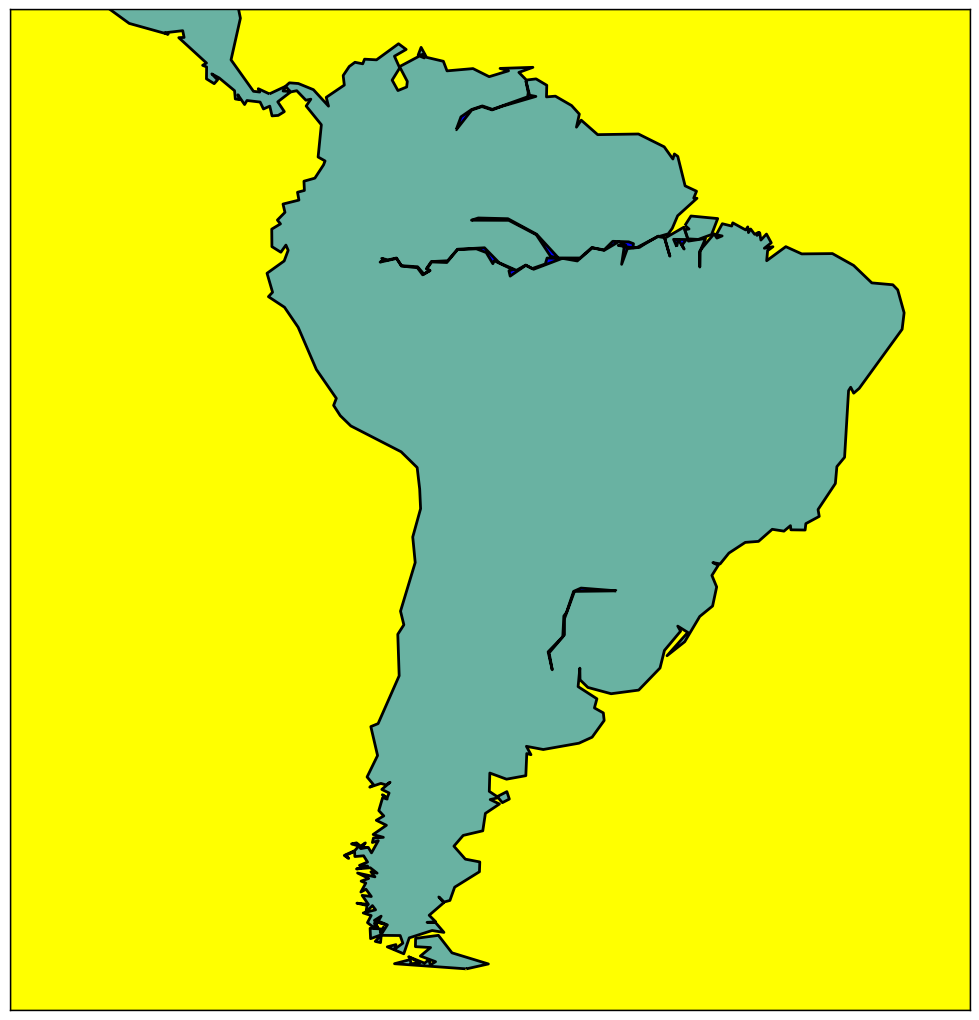

In [ ]:
#adding boundaries, color, width and so on..
# Initialize
m=Basemap(llcrnrlon=-100, llcrnrlat=-58,urcrnrlon=-30,urcrnrlat=15)

# Background color:
m.drawmapboundary(fill_color='yellow')

# Continent in green
m.fillcontinents(color='#69b2a2',lake_color='blue')

# Show the coast lines in black
m.drawcoastlines(color='black', linewidth=2)

plt.show()

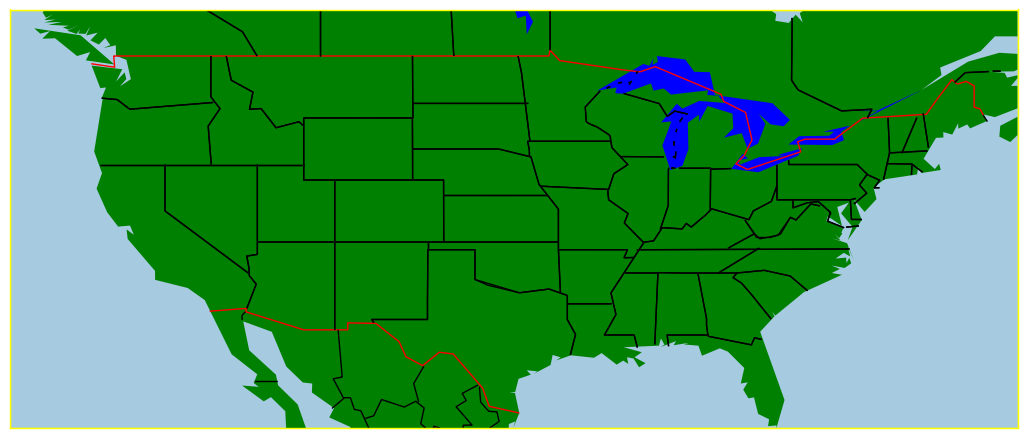

In [ ]:
#the list of available boundaries using  drawcoastlines()
#Country boundaries using drawmapboundary()
#continents with fillcontinents(), rivers with drawrivers(), US counties with drawcounties() and US states with drawstates()

# initialise US boundaries
map = Basemap(llcrnrlon=-130, ##llcrnrlon - lower left corner longitude
              llcrnrlat=25, #llcrnrlat - lower left corner latitude
              urcrnrlon=-65., #urcrnrlon - upper right corner longitude
              urcrnrlat=52., #urcrnrlat - upper right corner latitude
              lat_0 = 40.,
              lon_0 = -80)

# background color
map.drawmapboundary(fill_color='#A6CAE0', color="yellow")

# country color
map.fillcontinents(color='green',lake_color='blue')
map.drawcountries(color='red', linewidth=1)

# Show states
map.drawstates(color='black', linewidth=1)

plt.show()

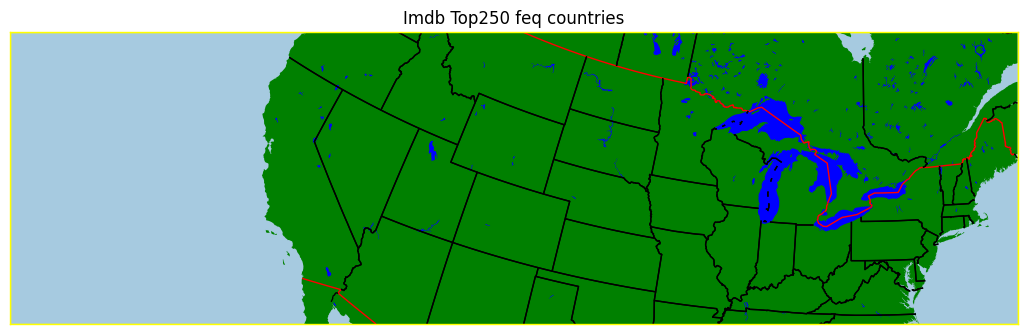

In [ ]:
#high resolution using resolution='i', projection='tmerc'
# initialise US boundaries
map = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52., lat_0 = 40., lon_0 = -80,
              resolution='i', projection='tmerc')   #higher resolution try resolution="i"

# background color
map.drawmapboundary(fill_color='#A6CAE0', color="yellow")

# country color
map.fillcontinents(color='green',lake_color='blue')
map.drawcountries(color='red', linewidth=1)

# Show states
map.drawstates(color='black', linewidth=1)

plt.title('Imdb Top250 feq countries')
plt.show()

**map north Amercan** [tutorial](https://rabernat.github.io/research_computing/intro-to-basemap.html)

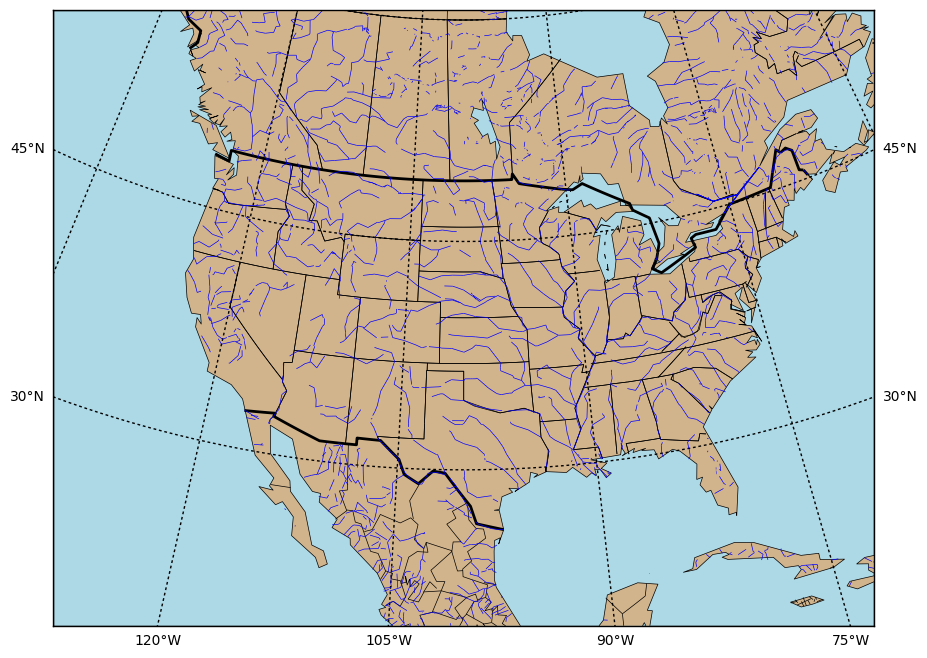

In [ ]:
#map centered on North America with lines showing the country and state boundaries as well as rivers

fig = plt.figure(num=None, figsize=(12, 8) )

m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' )
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

**Draw an etopo relief image.**

In [ ]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.etopo()
plt.show()

**Draw a shaded relief image.**

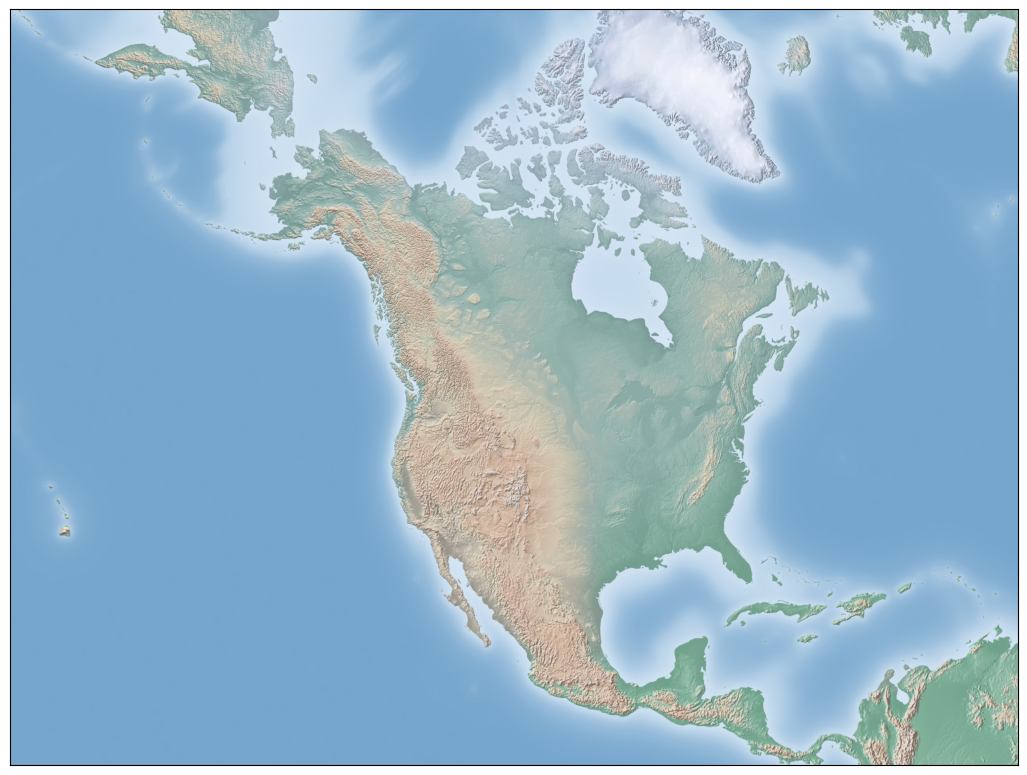

In [ ]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()
plt.show()

**Draw coastlines, filling ocean and land areas.**

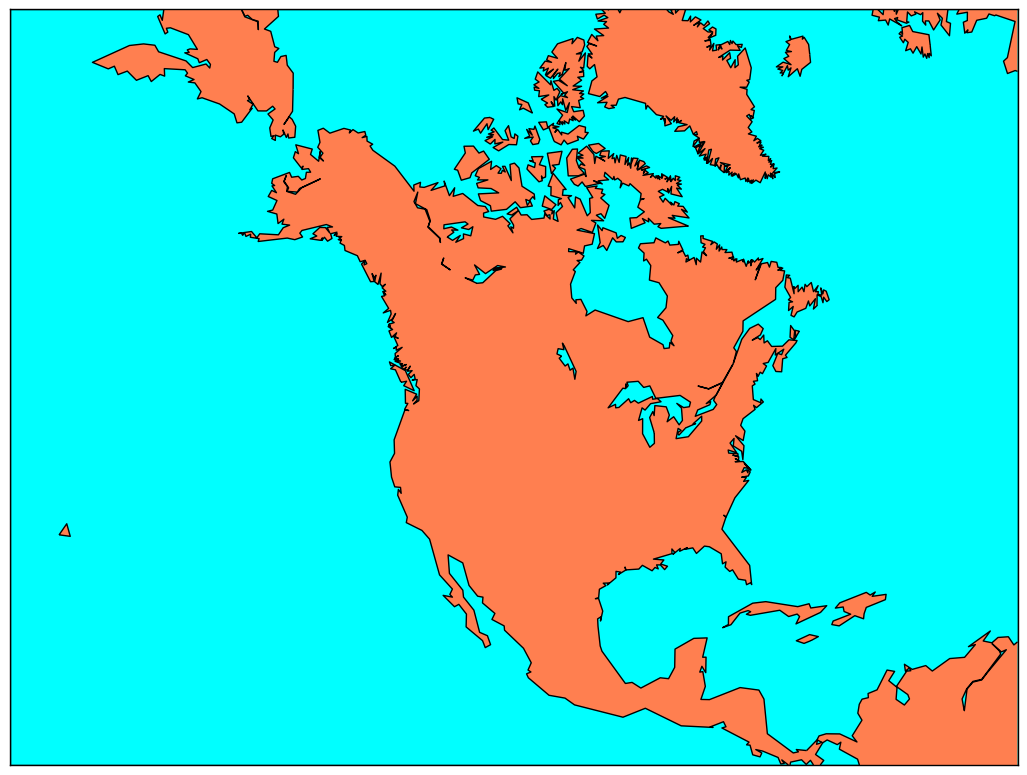

In [ ]:
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

Rwanda shapefile

downlaod shape [Davi-GIS](https://diva-gis.org/Data)

In [ ]:
#reading .sh file all files should be in one dir
#unzip zipf into drive
!unzip -u "/content/RWA_adm.zip" -d "/content/drive/MyDrive/Rwa_shapefile"

<Axes: >

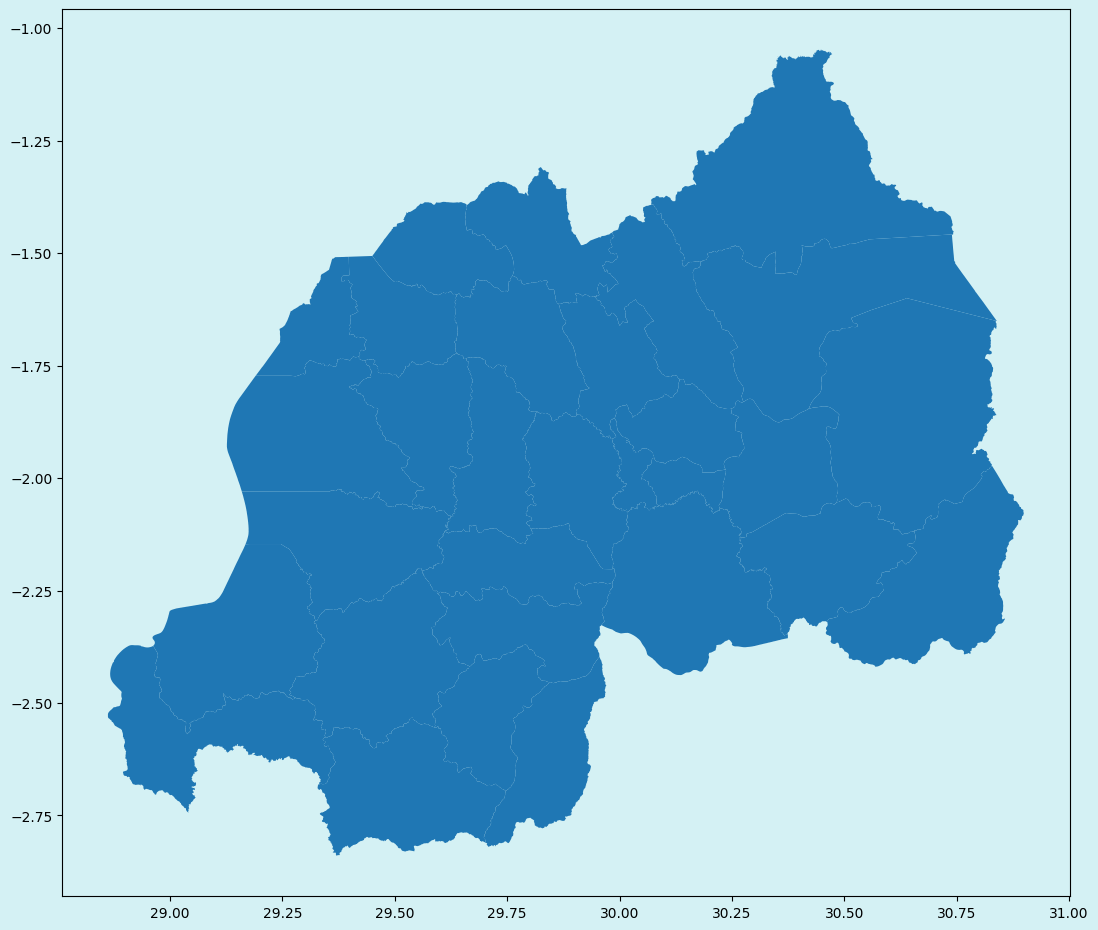

In [111]:
from osgeo import gdal
import geopandas as gpd
import matplotlib.pyplot as plt

gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')

in_vector = '/content/drive/MyDrive/Rwa_shapefile/RWA_adm2.shp' # path from drive
gdf = gpd.read_file(in_vector)
p = gdf.crs
gdf.plot()